In [1]:
import pandas as pd # to load and manipulate data
import numpy as np # to calculate
import os # allow us to easily perform operations on files and directories.
from sklearn.preprocessing import LabelEncoder# to encode target labels with value between 0 and n_classes-1.
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.metrics import accuracy_score #to create accuracy score
from sklearn.metrics import confusion_matrix #to create confusion matrix
from sklearn.metrics import plot_confusion_matrix #to draw confusion matrix
from sklearn.metrics import precision_score #to create precision score
from sklearn.metrics import recall_score #to create recall score
from sklearn.metrics import classification_report #to create classification report
from sklearn.model_selection import train_test_split# to split dataset into training set and test set
from sklearn import tree # to visualize Decision Tree
from matplotlib import pyplot as plt #to draw Decision Tree


In [2]:
os.getcwd() # return the current file path.

'C:\\Users\\ASUS'

In [3]:
os.chdir('C:\\Users\\ASUS\\Desktop\\Data Mining')#give a chance from one directory to another directory

In [4]:
os.getcwd()# I changed my current directory with os.chdir(),When I look at the directory I am in, I see the change.

'C:\\Users\\ASUS\\Desktop\\Data Mining'

In [5]:
df=pd.read_csv("diabetes_data_upload.csv")# import Dataset

In [6]:
df.head()# dataset obseravtions in the head

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
print ("Dataset Shape: ", df.shape)# Printing the dataset shape

Dataset Shape:  (520, 17)


In [8]:
df.isnull()#is there any missing value? if the answer is "False",there is no missing value

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#prints information about the DataFrame.
#The information contains the number of columns, column labels, column data types, memory usage,
#range index, and the number of cells in each column (non-null values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [10]:
# converting categorical terms into numeric
conv  = df.replace(to_replace=['No', 'Yes'], value=[0, 1])#replacing 'No' as '0' and 'Yes' as '1'
# get the dummies and store it in a variable
dummies=pd.get_dummies(df.Gender)#'Gender' column is taken and it will return the dummy variable columns as Female
#and Male.
#concatenate the dummies columns into the dataframe
merged=pd.concat([conv, dummies], axis='columns') #if given the name of two dataframes and axes,it will give  
#the merged data frame
# lbl_encoder object knows how to understand word labels
lbl_encode = LabelEncoder()
# Labels 'Positive' and 'Negative' in column 'class' encode to '1' and '0' respectively in column 'Diabetes'
merged["Diabetes"] = lbl_encode.fit_transform(df["class"])
# drop the original ‘Gender’ and ‘class’ columns ,because it has the dummy variable columns and ıt doesn't need 
#the text column.
final=merged.drop(['Gender','class'],axis='columns')
#see the desired dataframe is obtained
final

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Female,Male,Diabetes
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,1
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0,1
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0


In [11]:
#prints information about the DataFrame.
#The information contains the number of columns, column labels, column data types, memory usage,
#range index, and the number of cells in each column (non-null values)
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Polyuria            520 non-null    int64
 2   Polydipsia          520 non-null    int64
 3   sudden weight loss  520 non-null    int64
 4   weakness            520 non-null    int64
 5   Polyphagia          520 non-null    int64
 6   Genital thrush      520 non-null    int64
 7   visual blurring     520 non-null    int64
 8   Itching             520 non-null    int64
 9   Irritability        520 non-null    int64
 10  delayed healing     520 non-null    int64
 11  partial paresis     520 non-null    int64
 12  muscle stiffness    520 non-null    int64
 13  Alopecia            520 non-null    int64
 14  Obesity             520 non-null    int64
 15  Female              520 non-null    uint8
 16  Male                520 non-null    uint8
 1

In [12]:
final.describe() #computes and displays summary statistics for a Python dataframe

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Female,Male,Diabetes
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.369231,0.630769,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.483061,0.483061,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#split dataset in features variable (independant variables) and target variable(dependant variable)
x = final.drop(['Diabetes'], axis='columns')#Features variables include all columns except Diabetes column
y = final['Diabetes']#Target variable include only Diabetes column

print(x)#print independant variables
print(y)#print dependant variable


     Age  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0     40         0           1                   0         1           0   
1     58         0           0                   0         1           0   
2     41         1           0                   0         1           1   
3     45         0           0                   1         1           1   
4     60         1           1                   1         1           1   
..   ...       ...         ...                 ...       ...         ...   
515   39         1           1                   1         0           1   
516   48         1           1                   1         1           1   
517   58         1           1                   1         1           1   
518   32         0           0                   0         1           0   
519   42         0           0                   0         0           0   

     Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0      

In [14]:
#defining a normalization function so that one variable does not take precedence over the other
def normalize(value):
    # normalizing data between 0 and 1 range by using below formula
    return (value-np.min(value))/(np.max(value)-np.min(value))
#apply the normalization function for 'Age' column,data will be between 0 and 1 range     
x['Age']=normalize(x['Age'])

In [15]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
#Given two sequences, like x and y below, train_test_split() performs the split and returns four sequences  in this order:
#x_train: The training part of the first sequence (x),x_test: The test part of the first sequence (x)
#y_train: The training part of the second sequence (y),y_test: The test part of the second sequence (y)
#random_state make  tests reproducible, ıt present random split with the same output for each function call
#The value of random_state isn’t important—it can be any non-negative integer.random_state=50
#train_size is the number that defines the size of the training set. 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=50)

In [16]:
print("Training Set")
print(y_train.value_counts())# Print counts of the y_train value
print("Testing Set")
print(y_test.value_counts())# Print counts of the y_test value

Training Set
1    266
0    150
Name: Diabetes, dtype: int64
Testing Set
1    54
0    50
Name: Diabetes, dtype: int64


In [17]:
#create a decision tree and fit it to the training data
clf=DecisionTreeClassifier(max_depth=4,criterion='entropy')#Create Decision Tree classifier object with maximum depth
#of the tree is 4 and criterion is entropy
clf=clf.fit(x_train,y_train)#training(fitting)the classifier with the training set

In [18]:
clf.get_params()# to see which default parameters run in the decision tree

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [19]:
prediction=clf.predict(x_test)#Predictions on the test dataset
prediction #predicted labels

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [20]:
clf.predict_proba(x_test) #returns probabilities of a classification label

array([[0.        , 1.        ],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [0.96581197, 0.03418803],
       [0.57142857, 0.42857143],
       [0.96581197, 0.03418803],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.54545455, 0.45454545],
       [0.        , 1.        ],
       [0.96581197, 0.03418803],
       [0.54545455, 0.45454545],
       [0.96581197, 0.03418803],
       [0.        , 1.        ],
       [0.54545455, 0.45454545],
       [0.96581197, 0.03418803],
       [0.        , 1.        ],
       [0.96581197, 0.03418803],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.96581197, 0.03418803],
       [0.        , 1.        ],
       [0.96581197, 0.03418803],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.96581197, 0.03418803],
       [0.96581197, 0.03418803],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.

In [21]:
print("Accuracy of Decision Tree Model: ",accuracy_score(y_test,prediction))# Model Accuracy, how often is the classifier 
#correct?


Accuracy of Decision Tree Model:  0.9038461538461539


In [22]:
#Create confusion matrix to check the performance of a classification model on a set of test data for which the true 
#values are known.
print("Confusion Matrix of Decision Tree Model: ",confusion_matrix(y_test,prediction,labels=[0,1]))

Confusion Matrix of Decision Tree Model:  [[47  3]
 [ 7 47]]


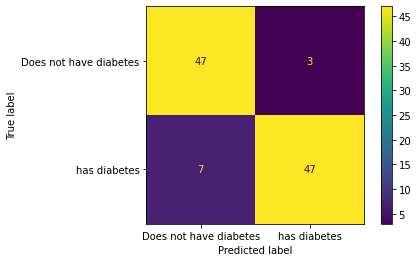

In [23]:
#plot_confusion_matrix() will run the test data down the tree and draw a confusion matrix
plot_confusion_matrix(clf,x_test,y_test,display_labels=["Does not have diabetes","has diabetes"])

In [24]:
#Create precision to show how many of the values ıt estimated as positive are actually positive
print("Precision of Decision Tree Model: ",precision_score(y_test,prediction))

Precision of Decision Tree Model:  0.94


In [25]:
#Create recall to show how many of the operations ıt should has predicted as Positive
print("Recall Score of Decision Tree Model: ",recall_score(y_test,prediction))

Recall Score of Decision Tree Model:  0.8703703703703703


In [26]:
#to measure the quality of predictions from a classification algorithm. How many predictions are True and how many 
#are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict 
#the metrics of a classification report
print(classification_report(y_test,prediction,target_names=["Negative ","Positive"]))

              precision    recall  f1-score   support

   Negative        0.87      0.94      0.90        50
    Positive       0.94      0.87      0.90        54

    accuracy                           0.90       104
   macro avg       0.91      0.91      0.90       104
weighted avg       0.91      0.90      0.90       104



In [27]:
feature_names=x.columns #feature names

In [28]:
clf.feature_importances_#which features most important than the others to see like an array

array([0.        , 0.17480664, 0.49814224, 0.        , 0.        ,
       0.03711777, 0.        , 0.        , 0.        , 0.05263488,
       0.04161391, 0.        , 0.01829197, 0.05280871, 0.        ,
       0.12458389, 0.        ])

In [29]:
#the feature_names corresponding to the feature_importance  are placed in the dataframe in descending order
feature_importance=pd.DataFrame(clf.feature_importances_,index=feature_names).sort_values(0,ascending=False)
feature_importance #print feature importance dataframe

,0
Polydipsia,0.498142
Polyuria,0.174807
Female,0.124584
Alopecia,0.052809
Irritability,0.052635
delayed healing,0.041614
Polyphagia,0.037118
muscle stiffness,0.018292
Age,0.000000
partial paresis,0.000000


In [30]:
features=list(feature_importance[feature_importance[0]>0].index)#List the names of those whose feature importance values 
#are greater than 0
features

['Polydipsia',
 'Polyuria',
 'Female',
 'Alopecia',
 'Irritability',
 'delayed healing',
 'Polyphagia',
 'muscle stiffness']

<AxesSubplot:>

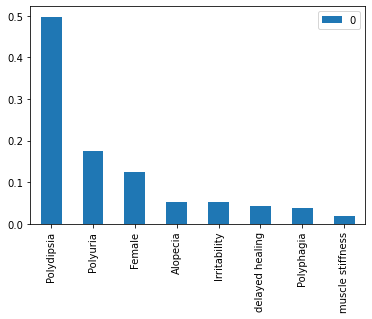

In [31]:
#Draw those with attribute importance greater than 0
feature_importance.head(8).plot(kind='bar')

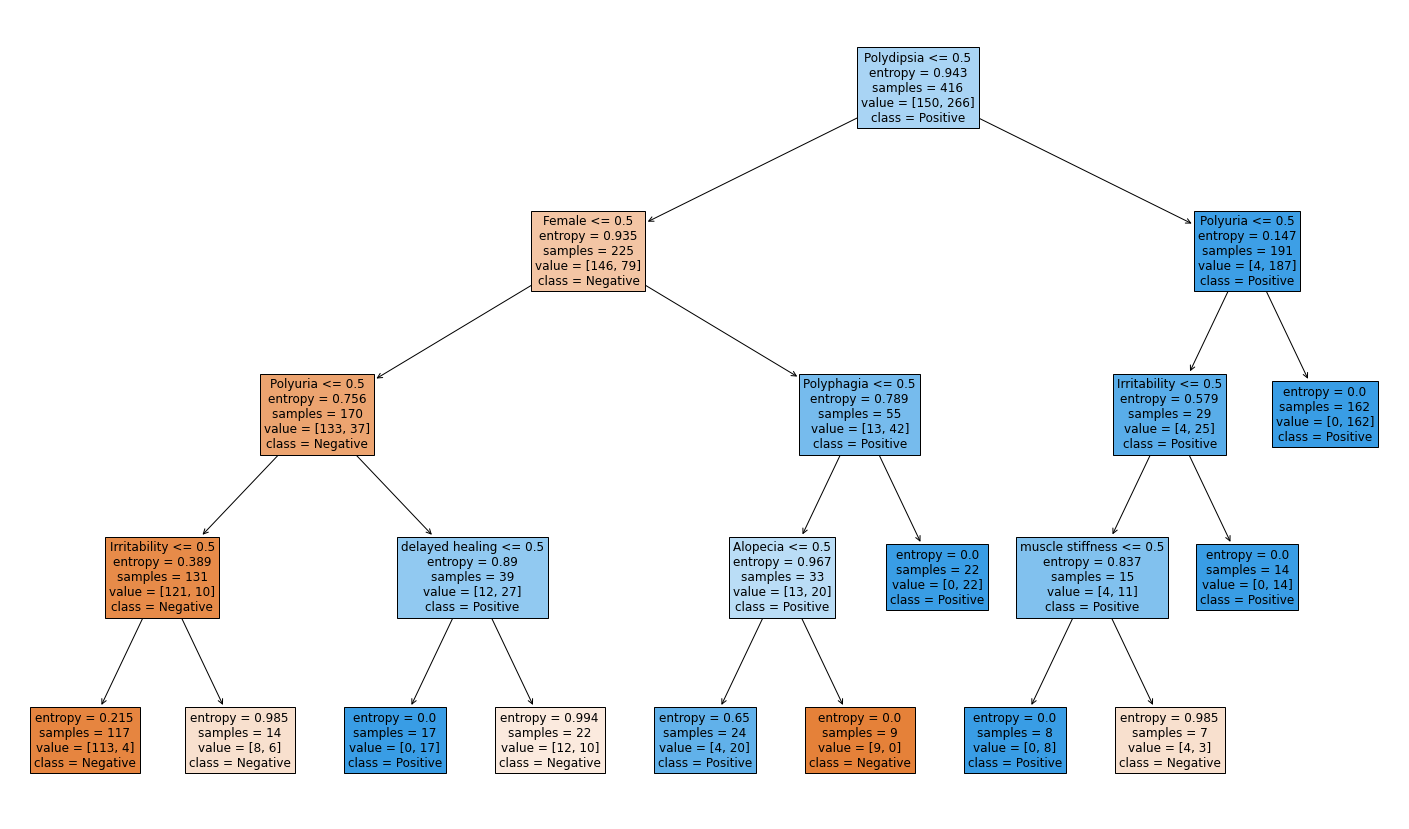

In [32]:
fig=plt.figure(figsize=(25,15)) #Determining the figure size of the decision tree to be formed
#Visualize the decision tree
_=tree.plot_tree(clf,feature_names=feature_names,class_names={0:"Negative",1:"Positive"},filled=True,fontsize=12)